In [8]:
# 實作多層感知器(MLP) 應用 MNIST 資料集 

import keras  # 深度學習框架 keras 模型( 建立、訓練、預測 )搭配 Tensorflow ( 後端引擎 ) 進行運算

from keras.datasets.mnist import load_data

#訓練模型 : ((訓練題目,訓練答案),(測試題目,測試答案)) = Load_data()
((x_train, y_train), (x_test, y_test)) = load_data()

In [20]:
#重要步驟 1.列出訓練資料跟測試資料有幾筆 .shape

print(x_train.shape) #訓練資料 60000筆 ，28X28的圖像(黑白)，如果是rgb(彩色)後面會是三個值
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


8


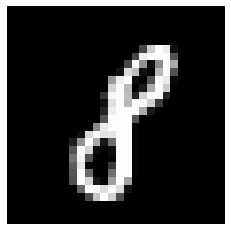

In [10]:
import matplotlib.pyplot as plt # plt畫圖函式庫

%matplotlib inline

import random #導入random模組
c = random.randint(0, 59999) # randint()是隨機生成指定範圍內的整數

print(y_train[c]) #列印出在y_train位置相對應剛剛產生的數字(c)

plt.axis("off") #關閉刻度線
plt.imshow(x_train[c],cmap = "gray")  #在plt印出圖像 plt.imshow()  #cmap = color map 指定成灰階

In [11]:
import pandas as pd # 製作表格套件
pd.DataFrame( x_train[c] ) # 將x_train相對位置c的資訊印轉成為二為表格列印出來

#0是黑色 #255全白 93灰色 #784個值 = 28*28的位置

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,206,255,237,16,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,253,253,253,83,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,16,142,253,167,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,182,253,83,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,83,248,234,7,0,0,0,0,0,0


In [21]:
#資料預處理  縮小(把255變成0~1,維度變一維)
# 1.題目預處理(Normalize)
# keras在準備隨機那組weights, 跟normalize的圖片比較搭
# 1.第一種方式 0 - 1 第二種方式 -1 - 1
# 攤開->Keras MLP 規定一定要攤開成為1D(維)  reshape
x_train_shape =  x_train.reshape(60000, 784) / 255
x_test_shape =  x_test.reshape(10000, 784) / 255
#Demo
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
#2.答案預處理-(One-hot encoding) 

#希望轉換後的樣子 :( 機率 )
#如果是 5:[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
#有可能輸出:[0, 0, 0.2, 0.6, 0.8, 0, 0, 0, 0] 

from keras.utils.np_utils import to_categorical #.utils(能用的功能).np(numpy)_utils,  to_categorical( = one-hot encoding)

y_train_cat = to_categorical(y_train) #將原本單一數字轉換成串列機率

y_test_cat = to_categorical(y_test)

# 看前後差異
print("原來",y_train[1])

print("後來",y_train_cat[1])

原來 0
後來 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [35]:
# keras建立模型

from keras.models import Sequential #建立一個蛋糕架(Sequential),加入一層一層的蛋糕(Layers)
from keras.layers import Dense #layers: Dense( 全連接層 )設定 參數、激活函式

mlp = Sequential()


mlp.add(Dense(128, activation = "relu", input_dim = 784))# 784個輸入 128個輸出 # input_dim:輸入有幾個

mlp.add(Dense(10, activation = "softmax")) #輸出20個

mlp.summary()#秀模型

# 第一層 param(需要調整的參數 = w): 784*128 + 128(bias) = 100480
# 第二層 Param: 128*10(神經元連結)+ 10( 10個激活  = 10個偏差)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [36]:
#確定模型的訓練方式
#隨機(隨便選一組 weights)梯度(正確方向)下降

#資料科學只看loss( 距離 ) : 最後輸出一個(0or1)( binary_crossentropy )，最後輸出多個( categorical_crossentropy ) 
#loss( 0~1 )但要展示給他人看 metrics = ["accuracy"]
#optimizer:梯度下降的時候優化 ，基於動量(在移動的時候不是等速度，而是有速度累積)像玩具軌道小汽車(adam優化器: 融合速度、步長) 
mlp.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer="adam")


In [37]:
# batch:看一批(150)做一次梯度下降(修正)
# epochs: 整份看幾次 
# 10個epochs , 150batch : 60000*10/150 _>400次梯度下降

# 輸出時:只看val_loss( 驗證資料 ) 接近平滑即可( 防止過擬合 )，要再多訓練(會從上次開始)直接改epchos ,
# verbose = 1 完整(預設) ， 2  簡化版

mlp.fit(x_train_shape,
        y_train_cat,
        batch_size = 150,
        epochs = 5,
        validation_split= 0.1,
       verbose = 2)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 2s - loss: 0.3959 - acc: 0.8932 - val_loss: 0.1802 - val_acc: 0.9532
Epoch 2/5
 - 1s - loss: 0.1867 - acc: 0.9467 - val_loss: 0.1307 - val_acc: 0.9663
Epoch 3/5
 - 2s - loss: 0.1360 - acc: 0.9609 - val_loss: 0.1084 - val_acc: 0.9698
Epoch 4/5
 - 2s - loss: 0.1058 - acc: 0.9699 - val_loss: 0.0937 - val_acc: 0.9738
Epoch 5/5
 - 2s - loss: 0.0861 - acc: 0.9754 - val_loss: 0.0858 - val_acc: 0.9753


In [11]:
#predict之後直接跟正確答案做比較 直接將loss跟正確率算出來
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 97us/step


[0.10372235009297728, 0.969]

In [38]:
#預測機率( predict_classes:) 分類
pre = mlp.predict_classes(x_test_shape)

from sklearn.metrics import confusion_matrix #混淆矩陣

#數字比數字所以是 y_test(而不是y_test_cat(機率)) 比 pre 
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,963,0,0,2,0,6,3,2,2,2
1,0,1118,4,0,0,1,2,2,8,0
2,6,1,997,4,3,0,2,9,10,0
3,0,0,2,983,0,10,0,6,8,1
4,1,0,4,1,954,0,3,3,2,14
5,2,1,0,5,0,873,4,1,4,2
6,5,3,0,1,7,10,928,0,4,0
7,0,5,10,7,0,1,0,994,3,8
8,3,0,2,6,3,5,3,4,944,4
9,3,6,0,6,6,3,0,8,6,971


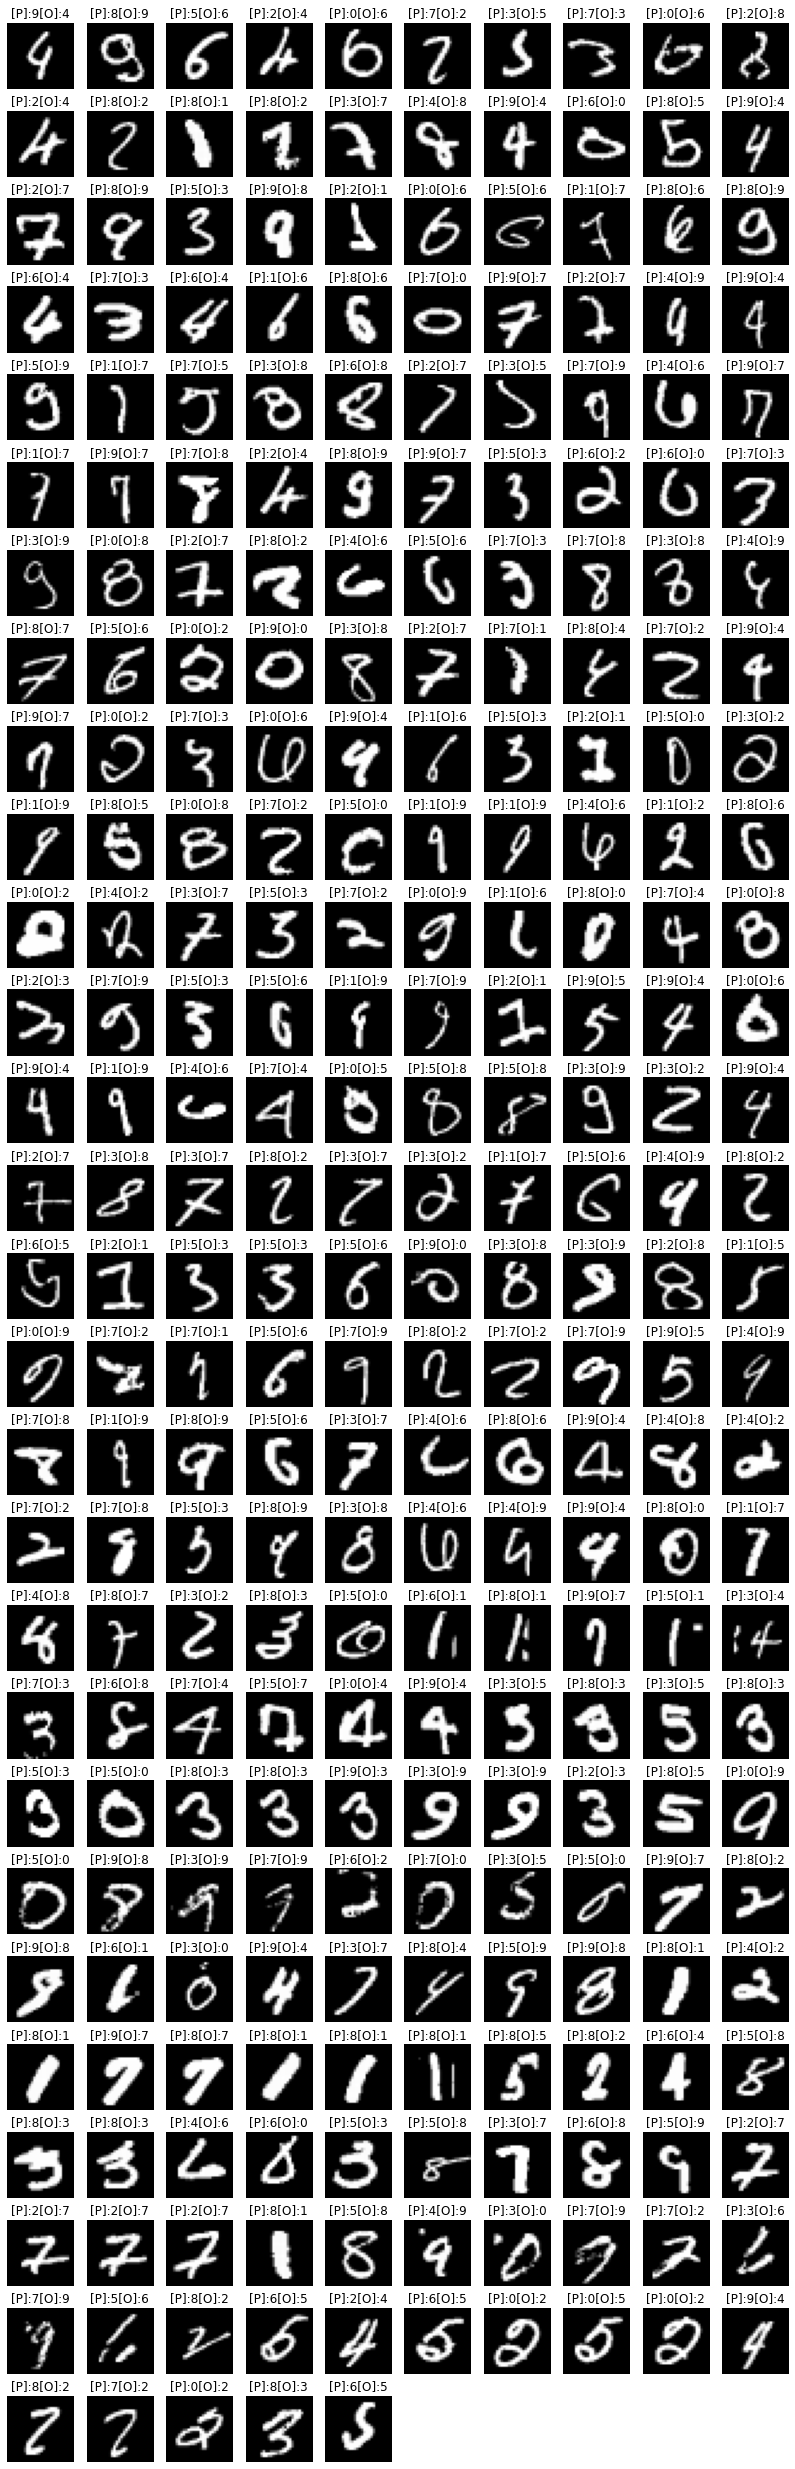

In [40]:
#numpy才能這樣在陣列每個數字比較
import numpy as np


#預測錯誤圖的原本標籤 ， True = 1，[0]把 tuple第一個位置取出
diff = np.nonzero( pre != y_test)[0]

#list:list[一個數字]
#numpy array : nparray[ [多個數字] ]  #一次取大量資料

ofalse = y_test[diff] #預測錯誤的圖的原本標籤

prefalse = pre[diff] #預測錯誤的預測標籤

#把圖拿出來
imgfalse = x_test[diff]

#整張圖的長寬
plt.figure(figsize=(14, 45))

#設定寬(列) 高(行)
width = 10
height = int(len(imgfalse) / 10)  +1

for (i, img) in enumerate(imgfalse): # enumerate ( 印出索引值(tuple) ): (1, img),(2, img)
   
    #subplot指定(列數,行數, 第幾張圖(i開始))
    plt.subplot(height, width, i + 1)
    plt.axis("off") #關閉座標軸
   
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(ofalse[i]) 
    
    plt.title(t) #放title
    
    plt.imshow(img,cmap = "gray")